In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.stats import norm
from scipy.integrate import quad

# Comparing different ways of calculating KL-divergence

We have two distributions:

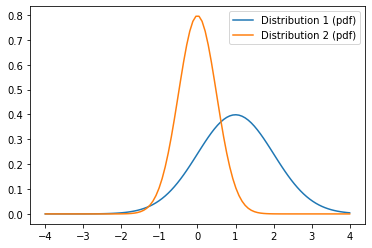

In [2]:
dist1 = norm(loc = 1, scale = 1)
dist2 = norm(loc = 0, scale = 0.5)

x_min = -4
x_max = 4
x = np.linspace(x_min, x_max, 100)

plt.plot(x, dist1.pdf(x), label="Distribution 1 (pdf)")
plt.plot(x, dist2.pdf(x), label="Distribution 2 (pdf)")
plt.legend()
plt.show()

# Exact KL-divergence of two Normal distributions

For the continuous case, KL-divergence is defined as:

$$D_\textbf{KL}(P || Q) = \int_{-\infty}^\infty p(x) \log \left( \frac{p(x)}{q(x)} \right) \,dx$$

For two normals, the KL divergence has a closed expression:

https://stats.stackexchange.com/a/7449

In [4]:
def kl(dist1, dist2):
    return np.log(dist2.std() / dist1.std()) + (dist1.std()**2 + (dist1.mean() - dist2.mean())**2) / (2 * dist2.std()**2) - 1/2

kl(dist1, dist2)

2.8068528194400546

## Estimating the continuous KL-divergence

We can approximate the integral using numerical integration:

2.7653837036319846

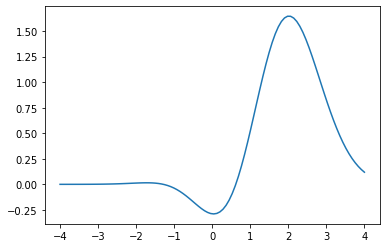

In [3]:
f = lambda x: dist1.pdf(x) * np.log(dist1.pdf(x) / (dist2.pdf(x) + 1e-16))

plt.plot(x, f(x))

integral, _ = quad(f, x_min, x_max)
integral

## Estimating the continuous KL-divergence, using kernel estimates from samples

Let's estimate the same integral, using kernel estimates:

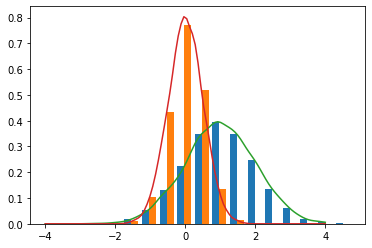

In [7]:
n_samples = 10000
draws1 = dist1.rvs(size=n_samples)
draws2 = dist2.rvs(size=n_samples)

# bw_method = .5
bw_method = 'scott'
kde1 = gaussian_kde(draws1, bw_method=bw_method)
kde2 = gaussian_kde(draws2, bw_method=bw_method)

plt.hist([draws1, draws2], bins=15, density=True)
plt.plot(x, kde1(x))
plt.plot(x, kde2(x))

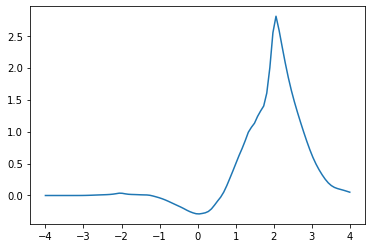

In [8]:
f = lambda x: kde1(x) * np.log((kde1(x) + 1e-6) / (kde2(x) + 1e-6))

plt.plot(x, f(x))
plt.show()

In [9]:
kernel_integral, error = quad(f, x_min, x_max)
kernel_integral, error

(2.926543940082984, 3.833462732085413e-08)

## Estimating the discrete KL-divergence using histograms

We could also use a histogram:

In [10]:
n_bins = 50
bins = np.linspace(x_min, x_max, n_bins)
h1, edges = np.histogram(draws1, bins=bins)
h2, edges = np.histogram(draws2, bins=bins)

h1 = h1 / np.sum(h1)
h2 = h2 / np.sum(h2)

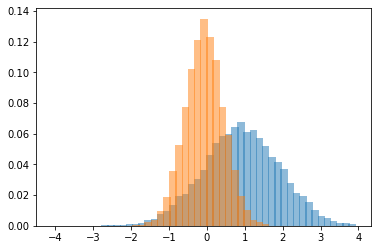

In [16]:
plt.bar(edges[:-1], h1, alpha = 0.5, width = 0.2)
plt.bar(edges[:-1], h2, alpha = 0.5, width = 0.2)
plt.show()

For the discrete case, the KL-divergence is defined:


$$D_\textbf{KL}(P || Q) = \sum_{x \in \mathcal{X}} p(x) \log \left( \frac{p(x)}{q(x)} \right)$$

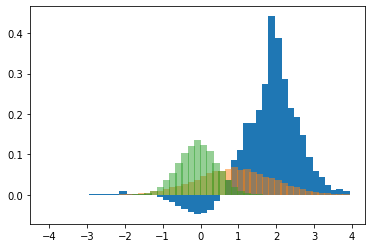

In [23]:
sumover =  h1 * np.log((h1 + 1e-6) / (h2 + 1e-6))

plt.bar(edges[:-1], sumover,width = 0.2)
#plt.bar(edges[:-1], h1, alpha = 0.5, width = 0.2)
#plt.bar(edges[:-1], h2, alpha = 0.5, width = 0.2)
plt.show()

In [17]:
discrete_kl = np.sum(sumover)
discrete_kl

2.727531068083581

### Comparison

In [18]:
print("Closed expression\t\t\t", kl(dist1, dist2))
print("Numerical integration\t\t\t", integral)
print("Numerical integration of kernels\t", kernel_integral)
print("Discretization using histograms\t\t", discrete_kl)

Closed expression			 2.8068528194400546
Numerical integration			 2.7653837036319846
Numerical integration of kernels	 2.926543940082984
Discretization using histograms		 2.727531068083581
